In [1]:
using Revise, DrWatson
@quickactivate

In [2]:
using main
using Distributions, BenchmarkTools, Plots, Pipe, ProgressMeter

gr(fmt=:png, levels=5, lw=0.5, msa=0.1, msw=0.5, ma=0.2, msc=:firebrick1, legend=:topright)
ProgressMeter.ijulia_behavior(:clear);

#### Functions for generating plots

In [3]:
cls = palette(:linear_wcmr_100_45_c42_n256, 100, rev=false)

function plt(d=2; lim=(-5, 5), l=200, bar=true)
    sq = range(lim..., length=l)
    if d == 2
        contourf(
            sq, sq, 
            (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), 
            c=cls, lw=0.1
        )
    elseif d >= 3
        contourf(
            sq, sq, 
            (x, y) -> model(d).f([x; y; fill(0, model(d).d - 2)]), 
            c=cls, lw=0.1
        )
    end
end

function make_plot(x, d, lim; kwargs...)
    k = sample(1:d, 2, replace=false)
    p = plot(plt(d; lim=lim), x -> 0, lim..., ma=0, lw=0, la=0, label="d=$d")
    # p = plot(x -> 0, lim..., ma=0, lw=0, la=0, label="d=$d")
    p = plot(p, x[:, k[1]], x[:, k[2]], c=:black, lw=0.1, la=0.25, ratio=1, label="")
    p = scatter(
        p,
        x[:, k[1]], 
        x[:, k[2]], 
        label="RA-HMC", c=:orange,
        ratio=1, grid=false; legend=:bottomright, ma=0.15
    )
end


model(d) = main.Model(
    ξ=MixtureModel(
        [MvNormal(x, 1.0 / d^0.2) for x in ([-10, +10] .* fill(ones(d)) ./ √d)]
    )
)

theme(:default)
Plots.gr_cbar_width[] = 0.02
gr(fmt=:png, levels=4, xguidefontsize=9, msc=:black, msw=0.1, tickfontsize=7)

Plots.GRBackend()

In [4]:
model(d) = Model(
    ξ=MixtureModel(
        [MvNormal(x, 1.0 / d^0.2) for x in ([-10, +10] .* fill(ones(d)) ./ √d)]
    )
)

model (generic function with 1 method)

---
### Example 1: $\mathbb R^3$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:28
  HaRAM(1.0346132235271497, 14, 1.212041509345747, Any[]):  0.5626874625074985


Acceptance Ratio = 0.5567
 30.237966 seconds (56.54 M allocations: 2.950 GiB, 3.36% gc time, 88.93% compilation time: 0% of which was recompilation)


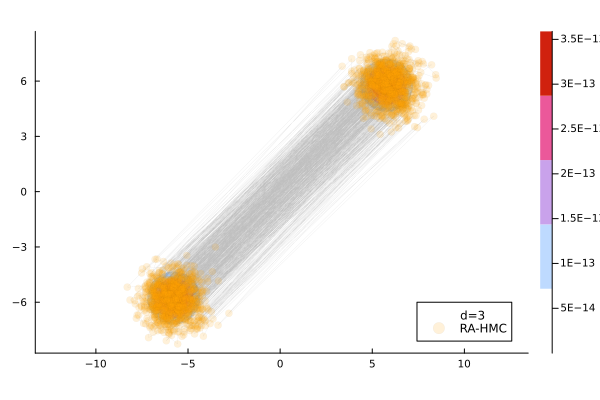

In [5]:
d = 3

@time s, a = mcmc(
    DualAverage(λ=15, δ=0.55),
    HaRAM(),
    model(d); n=5_000, n_burn=1_000
)

x_haram_3 = s[a, :];
make_plot(x_haram_3, d, (-8, 8))

---
### Example 2: $\mathbb R^{10}$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:19
  HaRAM(0.3002499138453224, 67, 0.8944810794726273, Any[]):  0.6776644671065787


Acceptance Ratio = 0.6767
 19.119571 seconds (56.48 M allocations: 6.210 GiB, 8.77% gc time, 3.97% compilation time)


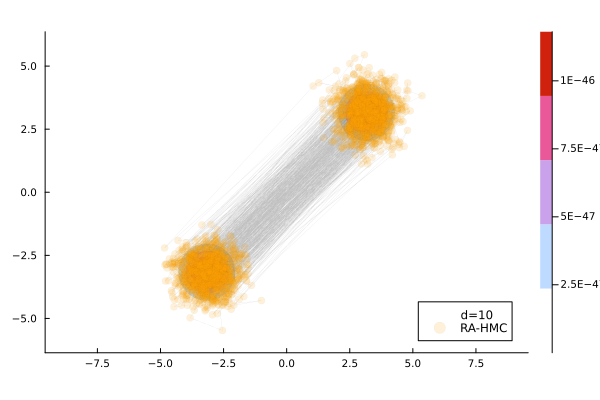

In [6]:
d = 10

@time s, a = mcmc(
    DualAverage(λ=20, δ=0.55),
    HaRAM(),
    model(d); n=5_000, n_burn=1_000
)

x_haram_10 = s[a, :];
make_plot(x_haram_10, d, (-6, 6))

---
### Example 3: $\mathbb R^{50}$

Progress: 100%|█████████████████████████████████████████| Time: 0:01:16
  HaRAM(0.3401165536876999, 88, 0.9853203031307262, Any[]):  0.7098580283943211


Acceptance Ratio = 0.7054
 76.497717 seconds (107.11 M allocations: 124.589 GiB, 11.07% gc time, 1.05% compilation time)


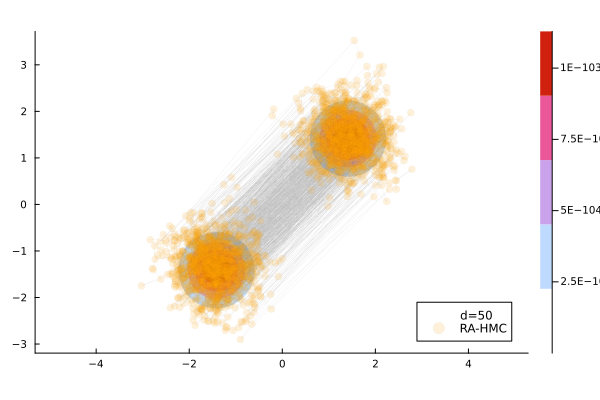

In [7]:
d = 50

@time s, a = mcmc(
    DualAverage(λ=30, δ=0.55),
    HaRAM(),
    model(d); n=5_000, n_burn=1_000
)

x_haram_50 = s[a, :];
make_plot(x_haram_50, d, (-3, 3))

---
### Example 4: $\mathbb R^{100}$

Progress: 100%|█████████████████████████████████████████| Time: 0:10:18
  HaRAM(0.12965919879328539, 386, 0.33330220907738645, Any[]):  0.7370525894821036


Acceptance Ratio = 0.7409
618.996023 seconds (565.25 M allocations: 1.699 TiB, 12.00% gc time)


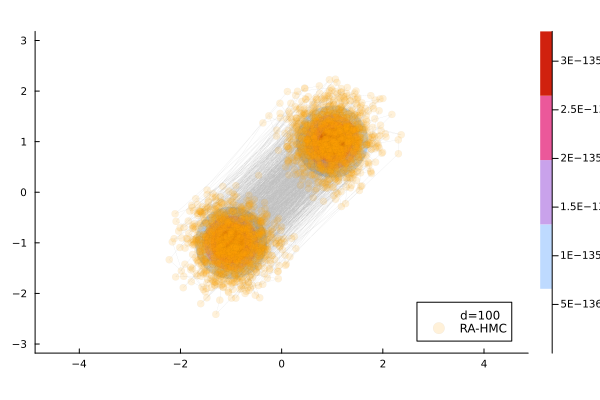

In [8]:
d = 100

@time s, a = mcmc(
    DualAverage(λ=50, δ=0.55),
    HaRAM(),
    model(d); n=5_000, n_burn=1_000
)

x_haram_100 = s[a, :];
make_plot(x_haram_100, d, (-3, 3))

In [10]:
# plt_3 = make_plot(x_haram_3, 3, (-8, 8))
# plt_10 = make_plot(x_haram_10, 10, (-6, 6))
# plt_50 = make_plot(x_haram_50, 50, (-4, 4))
# plt_100 = make_plot(x_haram_100, 100, (-3, 3))

# d = [3, 10, 50, 100]
# # savefig.(plotsdir.("new/autotune/" .* _ .* [".pdf", ".svg"] ))
# @pipe d .|> begin
#     plot(eval(Meta.parse("plt_" * string(_))));
#     savefig.(plotsdir.("new/autotune/" .* string(_) .* [".pdf", ".svg"] ))
# end

4-element Vector{Vector{String}}:
 ["/storage/work/s/suv87/julia/haram/plots/new/autotune/3.pdf", "/storage/work/s/suv87/julia/haram/plots/new/autotune/3.svg"]
 ["/storage/work/s/suv87/julia/haram/plots/new/autotune/10.pdf", "/storage/work/s/suv87/julia/haram/plots/new/autotune/10.svg"]
 ["/storage/work/s/suv87/julia/haram/plots/new/autotune/50.pdf", "/storage/work/s/suv87/julia/haram/plots/new/autotune/50.svg"]
 ["/storage/work/s/suv87/julia/haram/plots/new/autotune/100.pdf", "/storage/work/s/suv87/julia/haram/plots/new/autotune/100.svg"]